In [1]:
import numpy as np
from Frenel_Holo import FullReconstruct
import cv2
import os   
import qrcode
import matplotlib.pyplot as plt

In [98]:
def generate_dataset(write_path_qr, write_path_holo, write_path_freconstr, n_samples_train, n_samples_val,
                     N = 96, box_size = 2,  ps = 5.5e-6, wavelength = 532e-9):
    z_0 = N * ps * ps / wavelength
    registr_distantion = 6
    # data_size = np.random.randint(1,50)
    data_size = 29 # for 5 version it's max value
    for n in range(n_samples_train):

        data = np.random.randint(10, size = data_size)
        qr = qrcode.QRCode(error_correction = qrcode.constants.ERROR_CORRECT_H, box_size = box_size, border = 0)
        qr.add_data(data)
        qr.make(fit = True)
        image = qr.make_image(fill_color = 'black', back_color = 'white')
        image = 255*np.array(image, dtype=int)
        amplitude = np.sqrt(np.array(image))
        phase = np.random.uniform(0, 2*np.pi, amplitude.shape)
        object_field = np.zeros((N, N), dtype = complex)
        object_field[0: amplitude.shape[0], 0: amplitude.shape[0]] = amplitude * np.exp(1j * phase)
        
        name = str(n) + '.png'
        object_field, hologram, rec_image = FullReconstruct(object_field, registr_distantion*z_0, plotting= False)
        cv2.imwrite(write_path_qr + 'train/' + name, object_field)
        cv2.imwrite(write_path_holo + 'train/' + name, hologram)
        cv2.imwrite(write_path_freconstr + 'train/' + name, rec_image)
        
    for n in range(n_samples_val):
    
        data = np.random.randint(10, size = data_size)
        qr = qrcode.QRCode(error_correction = qrcode.constants.ERROR_CORRECT_H, box_size = box_size, border = 0)
        qr.add_data(data)
        qr.make(fit = True)
        image = qr.make_image(fill_color = 'black', back_color = 'white')
        image = 255*np.array(image, dtype=int)
        amplitude = np.sqrt(np.array(image))
        phase = np.random.uniform(0, 2*np.pi, amplitude.shape)
        object_field = np.zeros((N, N), dtype = complex)
        object_field[0: amplitude.shape[0], 0: amplitude.shape[0]] = amplitude * np.exp(1j * phase)
        name = str(n) + '.png'
        object_field, hologram, rec_image = FullReconstruct(object_field, registr_distantion*z_0, plotting= False)
        cv2.imwrite(write_path_qr + 'val/' + name, object_field)
        cv2.imwrite(write_path_holo + 'val/' + name, hologram)
        cv2.imwrite(write_path_freconstr+ 'val/' + name, rec_image)
        

In [99]:
WRITEPATH_QR = '../QR_v5/qr_seq/'
WRITEPATH_HOLO = '../QR_v5/holo_seq/'
WRITEPATH_FREN = '../QR_v5/fren_seq/'

In [164]:
n_samples_train = 50000
n_samples_val = 5000

N = 64 #Размер объектного поля
box_size = 1 #Отсчетов картинки на один пиксель qr-кода
generate_dataset(WRITEPATH_QR, WRITEPATH_HOLO, WRITEPATH_FREN, n_samples_train, n_samples_val, N, box_size)


5

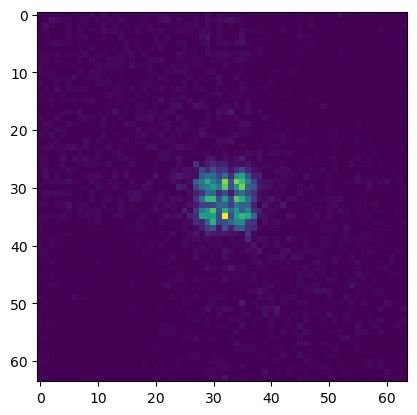

In [52]:
# Ячейка для экспериментов
data = np.random.randint(10, size = 29)
qr = qrcode.QRCode(error_correction = qrcode.constants.ERROR_CORRECT_H, box_size = 1, border = 0)
qr.add_data(data)
ps = 5.5e-6
wavelength = 532e-9
N = 64
z_0 = N * ps * ps / wavelength
registr_distantion = 6
image = qr.make_image(fill_color = 'black', back_color = 'white')
plt.imshow(image)
qr.version
amplitude = np.sqrt(np.array(image))
phase = np.random.uniform(0, 2*np.pi, amplitude.shape)
object_field = np.zeros((N, N), dtype = complex)
object_field[0: amplitude.shape[0], 0: amplitude.shape[0]] = amplitude * np.exp(1j * phase)
object_field, hologram, rec_image = FullReconstruct(object_field, registr_distantion*z_0, plotting= False)
plt.imshow(rec_image)
qr.version

In [14]:
np.unique(rec_image)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  22.,
        23.,  24.,  25.,  26.,  29.,  30.,  31.,  32.,  34.,  35.,  36.,
        37.,  39.,  40.,  41.,  42.,  43.,  44.,  46.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  56.,  57.,  58.,  59.,  61.,  62.,  63.,
        66.,  67.,  70.,  73.,  75.,  76.,  77.,  78.,  80.,  82.,  83.,
        84.,  86.,  93.,  94.,  95.,  96.,  99., 102., 103., 104., 106.,
       107., 110., 114., 121., 122., 127., 131., 134., 137., 141., 144.,
       147., 152., 153., 156., 169., 171., 172., 174., 177., 182., 184.,
       188., 198., 204., 208., 215., 216., 228., 255.])

In [7]:
hologram

array([[ 34.,  25., 104., ...,  26.,  66.,  55.],
       [ 14.,   1.,  24., ...,  29.,  62.,  16.],
       [ 58.,  35.,  28., ..., 103.,  20.,  45.],
       ...,
       [ 16.,  24., 109., ...,  52.,  20.,  62.],
       [  9.,   8.,  36., ...,  23.,  53.,  59.],
       [ 28.,   1., 124., ...,   5.,   8.,   3.]])